# week4 事前課題1 アヤメ

In [3]:
import numpy as np #行列
import pandas as pd #データ分析
import matplotlib.pyplot as plt
import seaborn as sns #matplotlibを使いやすくしたもの
%matplotlib inline

import pandas_profiling as pdp #pandas report

# pdp.ProfileReport(df)  #分析してくれる

import cv2



In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV

# 【課題1】練習のために特徴量とカテゴリを選択

選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

virgicolorとvirginica
sepal_lengthとpetal_length


In [7]:
# データの取得
from sklearn.datasets import load_iris

In [8]:
iris_dataset = load_iris()

In [183]:
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris_dataset.target, columns=["Species"])

In [11]:
df = pd.concat([X, y], axis=1)

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
Species_column=df['Species'].unique()

In [28]:
Species_column

array([0, 1, 2])

In [30]:
df1=df[df.Species !=0]

In [31]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [45]:
df2=df1.loc[:, ['sepal_length', 'petal_length', 'Species']]

In [46]:
df2.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [47]:
len(df2)

100

In [48]:
df2_column=df2.columns

In [49]:
df2_column

Index(['sepal_length', 'petal_length', 'Species'], dtype='object')

In [61]:
type(df2)

pandas.core.frame.DataFrame

## 【問題2】データの分析

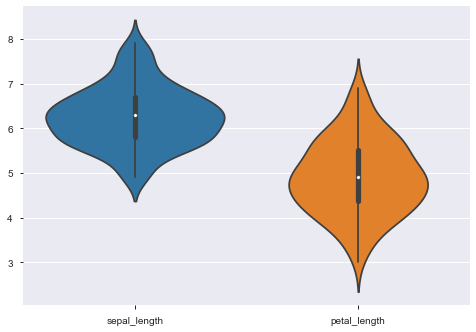

In [75]:
sns.violinplot(data=df2.iloc[: , 0:2])

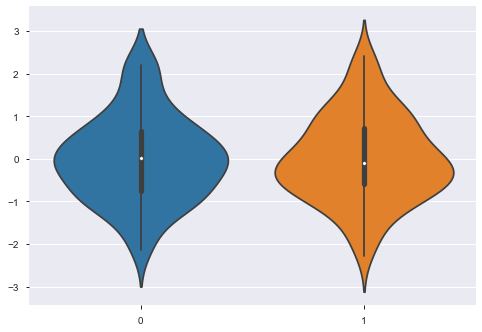

In [274]:
sns.violinplot(data=X_train_transform)

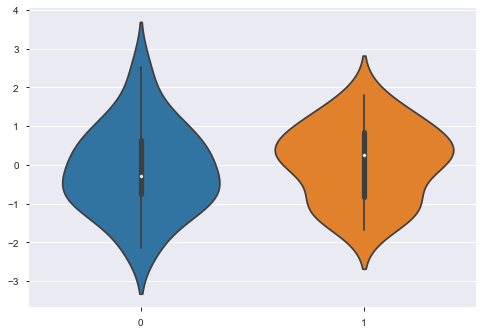

In [275]:
sns.violinplot(data=X_test_transform)

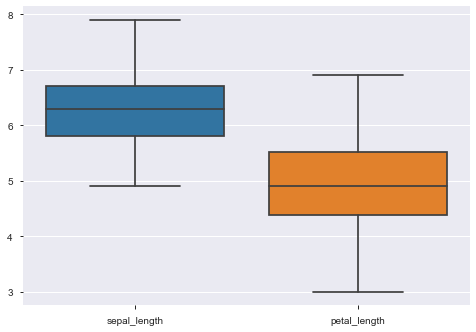

In [76]:
sns.boxplot(data=df2.iloc[: , 0:2])

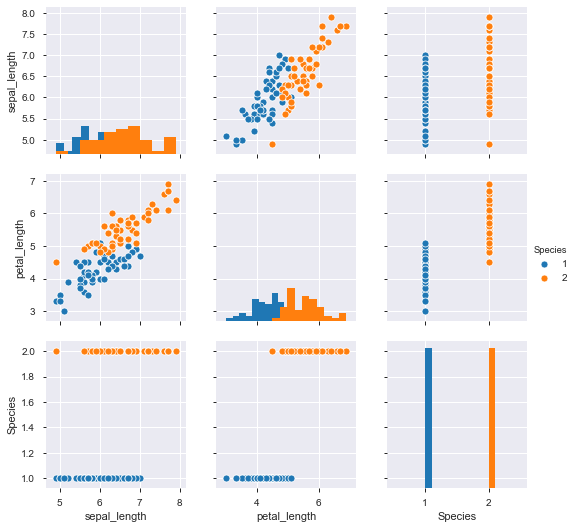

In [78]:
sns.pairplot(df2, hue="Species", diag_kind='hist')

## 【問題3】前処理・訓練用データと検証用データの分割

In [79]:
df2.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [80]:
type(df2)

pandas.core.frame.DataFrame

In [187]:
X=df2.loc[ :, ['sepal_length', 'petal_length']]

In [188]:
y=df2.Species

In [189]:
type(y)

pandas.core.series.Series

In [190]:
X=X.values

In [191]:
type(X)

numpy.ndarray

In [192]:
y=y.values

In [193]:
type(y)

numpy.ndarray

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

In [98]:
len(X)

100

In [99]:
len(X_train)

75

In [100]:
len(X_test)

25

## 【問題4】前処理・標準化

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

In [107]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [110]:
X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)

## 【問題5】学習と推定

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
nn_3 = KNeighborsClassifier(n_neighbors=3)

In [118]:
nn_3.fit(X_train_transform, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [119]:
nn_3.predict(X_test_transform)

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1])

In [115]:
y_test

array([2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1])

In [121]:
nn_3.score(X_train_transform, y_train) 

0.96

In [122]:
nn_3.score(X_test_transform, y_test) 

0.92

In [151]:
a = []
b = []
for i in range(1, 15):
    nn = KNeighborsClassifier(n_neighbors=i)
    nn.fit(X_train_transform, y_train) 
    a.append(nn.score(X_train_transform, y_train))
    b.append(nn.score(X_test_transform, y_test))
    print('n_neighbors={}, accuracy: train {: .3f}, test{: .3f}'.format(i, a[i-1], b[i-1]))

n_neighbors=1, accuracy: train  1.000, test 0.880
n_neighbors=2, accuracy: train  0.933, test 0.880
n_neighbors=3, accuracy: train  0.960, test 0.920
n_neighbors=4, accuracy: train  0.960, test 0.920
n_neighbors=5, accuracy: train  0.947, test 0.920
n_neighbors=6, accuracy: train  0.920, test 0.920
n_neighbors=7, accuracy: train  0.947, test 0.920
n_neighbors=8, accuracy: train  0.933, test 0.920
n_neighbors=9, accuracy: train  0.920, test 0.920
n_neighbors=10, accuracy: train  0.947, test 0.880
n_neighbors=11, accuracy: train  0.960, test 0.880
n_neighbors=12, accuracy: train  0.920, test 0.880
n_neighbors=13, accuracy: train  0.907, test 0.920
n_neighbors=14, accuracy: train  0.920, test 0.880


In [152]:
n = [i for i in range(1, 15)]
n

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

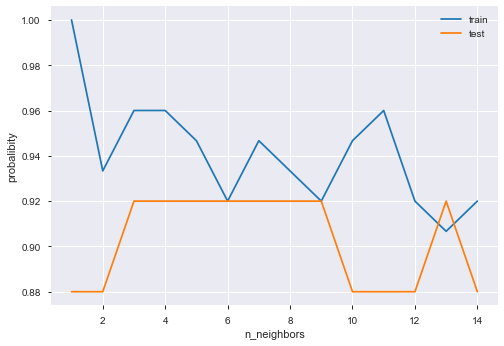

In [166]:
plt.ylabel('probalibity')
plt.xlabel('n_neighbors')
plt.plot(n, a, label='train')
plt.plot(n, b, label='test')
plt.legend()

n=3 - 9, 13で、testのscoreが0.92と一番高くなる

## 問題6】評価

In [168]:
from sklearn.metrics import accuracy_score

In [169]:
i = 3
nn = KNeighborsClassifier(n_neighbors=i)
nn.fit(X_train_transform, y_train) 
nn_predict = nn.predict(X_test_transform)

In [170]:
accuracy_score(y_test, nn_predict )

0.92

In [172]:
from sklearn.metrics import precision_score
precision_score(y_test, nn_predict )

0.9

In [173]:
from sklearn.metrics import recall_score
recall_score(y_test, nn_predict )

0.9

In [174]:
from sklearn.metrics import f1_score
f1_score(y_test, nn_predict )

0.9

In [175]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, nn_predict )

array([[ 9,  1],
       [ 1, 14]])

accuracy 全体での正解率（正答率）  
precision 適合率 ：正と予測したデータのうち，実際に正であるものの割合  
recall 再現率(sensitivity)：実際に正であるもののうち，正であると予測されたものの割合  
F値 (F尺度, F-measure)：精度と再現率の調和平

## 【問題7】可視化

In [177]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

/Users/ikono/Desktop/kikagaku_data/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


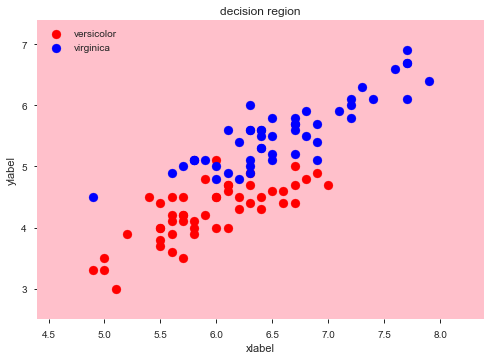

In [197]:
decision_region(X, y, nn_3)

# 標準化しないと上手く行かない（↑）

In [185]:
type(X)

pandas.core.frame.DataFrame

In [186]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [198]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [199]:
X = scaler.transform(X)

In [201]:
len(X)

100

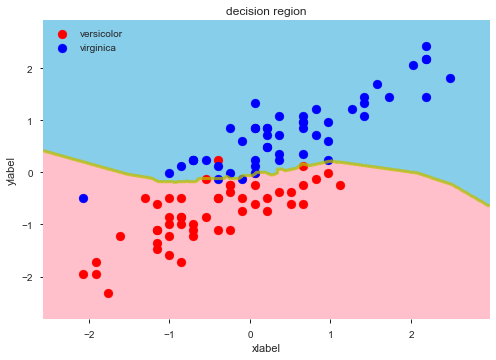

In [202]:
decision_region(X, y, nn_3)

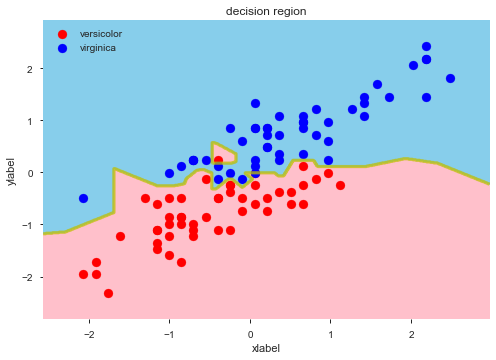

In [207]:
nn_1 = KNeighborsClassifier(n_neighbors=1)
nn_1.fit(X, y) 
decision_region(X, y, nn_1)

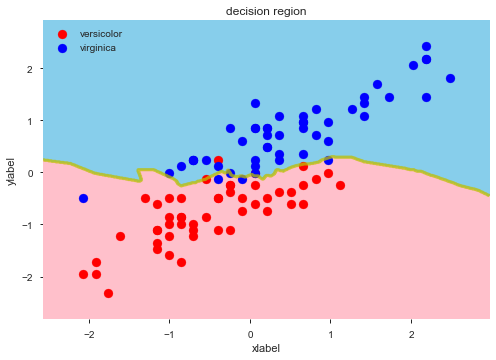

In [208]:
nn_10 = KNeighborsClassifier(n_neighbors=10)
nn_10.fit(X, y) 
decision_region(X, y, nn_10)

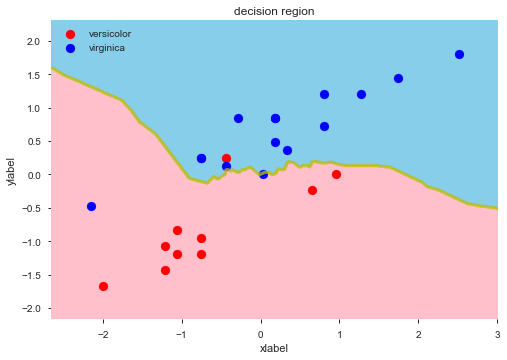

In [211]:
nn_10 = KNeighborsClassifier(n_neighbors=10)
nn_10.fit(X_train_transform, y_train) 
decision_region(X_test_transform, y_test, nn_10)

## 最近傍法

In [215]:
def evaluation(model, X_test_transform=X_test_transform, y_test=y_test):
    nn_predict = model.predict(X_test_transform)

    accuracy = accuracy_score(y_test, nn_predict )
    precision = precision_score(y_test, nn_predict )
    recall = recall_score(y_test, nn_predict )
    f1 = f1_score(y_test, nn_predict )
    confusion = confusion_matrix(y_test, nn_predict )
    
    return accuracy, precision, recall, f1, confusion

In [216]:
evaluation(nn)

(0.92, 0.9, 0.9, 0.9, array([[ 9,  1],
        [ 1, 14]]))

In [243]:
evaluation_result=pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1', 'confusion'])

In [244]:
evaluation_result

,accuracy,precision,recall,f1,confusion


In [245]:
evaluation_result.loc['neighbors']=evaluation(nn)

In [246]:
evaluation_result

,accuracy,precision,recall,f1,confusion
neighbors,0.92,0.9,0.9,0.9,"[[9, 1], [1, 14]]"


In [247]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(X_train_transform, y_train) 

/Users/ikono/Desktop/kikagaku_data/myvenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [248]:
evaluation(lreg)

(0.88, 0.8181818181818182, 0.9, 0.8571428571428572, array([[ 9,  1],
        [ 2, 13]]))

In [249]:
evaluation_result.loc['LogisticRegression']=evaluation(lreg)

In [250]:
evaluation_result

,accuracy,precision,recall,f1,confusion
neighbors,0.92,0.900000,0.9,0.900000,"[[9, 1], [1, 14]]"
LogisticRegression,0.88,0.818182,0.9,0.857143,"[[9, 1], [2, 13]]"


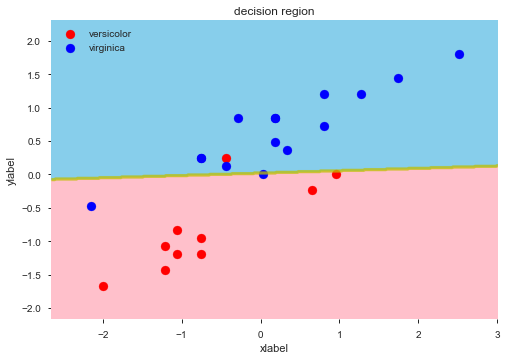

In [251]:
decision_region(X_test_transform, y_test, lreg)

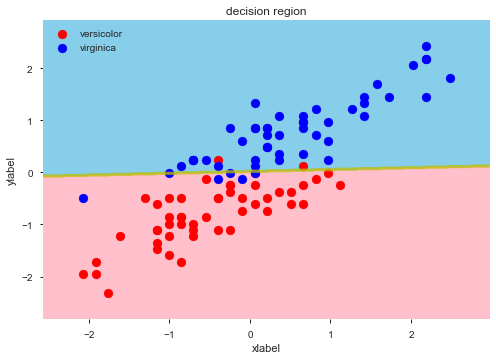

In [252]:
decision_region(X, y, lreg)

In [253]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_transform, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [254]:
evaluation(svc)

(0.92, 0.9, 0.9, 0.9, array([[ 9,  1],
        [ 1, 14]]))

In [255]:
evaluation_result.loc['SVC']=evaluation(svc)

In [256]:
evaluation_result

,accuracy,precision,recall,f1,confusion
neighbors,0.92,0.900000,0.9,0.900000,"[[9, 1], [1, 14]]"
LogisticRegression,0.88,0.818182,0.9,0.857143,"[[9, 1], [2, 13]]"
SVC,0.92,0.900000,0.9,0.900000,"[[9, 1], [1, 14]]"


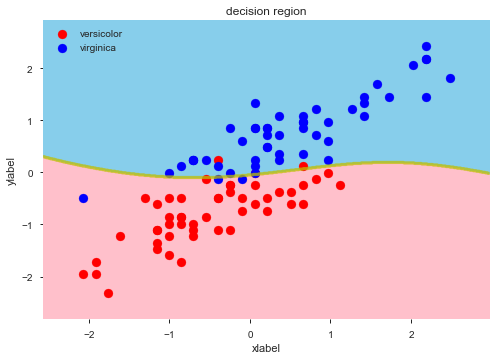

In [257]:
decision_region(X, y, svc)

In [258]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train_transform, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [259]:
evaluation(dtc)

(0.88, 0.8181818181818182, 0.9, 0.8571428571428572, array([[ 9,  1],
        [ 2, 13]]))

In [266]:
evaluation_result.loc['DecisionTreeClassifier']=evaluation(svc)
evaluation_result

,accuracy,precision,recall,f1,confusion
neighbors,0.92,0.900000,0.9,0.900000,"[[9, 1], [1, 14]]"
LogisticRegression,0.88,0.818182,0.9,0.857143,"[[9, 1], [2, 13]]"
SVC,0.92,0.900000,0.9,0.900000,"[[9, 1], [1, 14]]"
DecisionTreeClassifier,0.92,0.900000,0.9,0.900000,"[[9, 1], [1, 14]]"


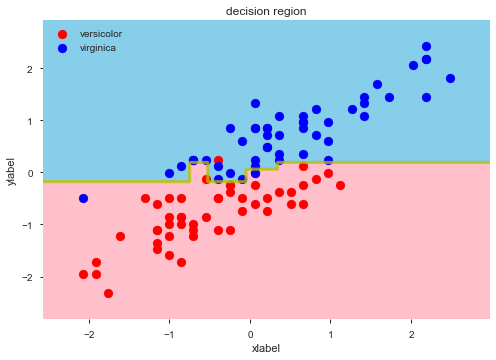

In [267]:
decision_region(X, y, dtc)

In [269]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_transform, y_train) 

/Users/ikono/Desktop/kikagaku_data/myvenv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [270]:
evaluation_result.loc['RandomForestClassifier']=evaluation(rfc)

In [271]:
evaluation_result

,accuracy,precision,recall,f1,confusion
neighbors,0.92,0.900000,0.9,0.900000,"[[9, 1], [1, 14]]"
LogisticRegression,0.88,0.818182,0.9,0.857143,"[[9, 1], [2, 13]]"
SVC,0.92,0.900000,0.9,0.900000,"[[9, 1], [1, 14]]"
DecisionTreeClassifier,0.92,0.900000,0.9,0.900000,"[[9, 1], [1, 14]]"
RandomForestClassifier,0.88,0.818182,0.9,0.857143,"[[9, 1], [2, 13]]"


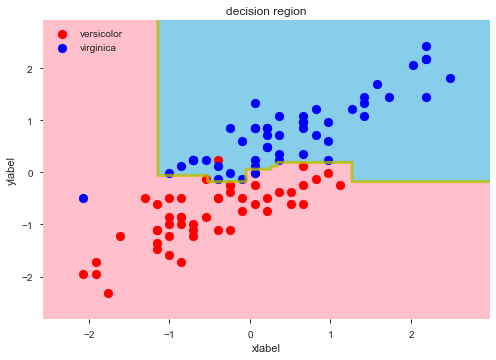

In [272]:
decision_region(X, y, rfc)

## 考察
５つの手法で大きな差はなかった  
 
ロジスティック回帰： 直線  
決定木・ランダムフォレスト： 直角のライン  
SVM: 滑らかな曲線  
最近傍法： いびつな曲線・直線

# 【問題9】（アドバンス課題）標準化の有無の比較

In [277]:
nn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

/Users/ikono/Desktop/kikagaku_data/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


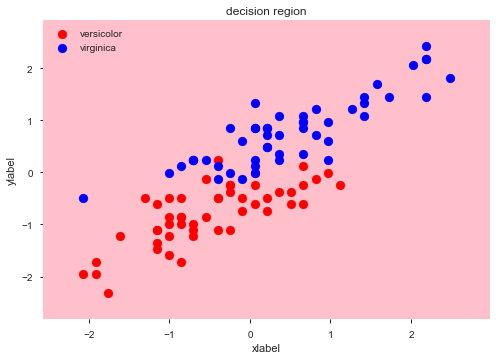

In [278]:
decision_region(X, y, nn)

In [279]:
evaluation_result_before_norm=pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1', 'confusion'])

In [281]:
evaluation_result_before_norm.loc['neighbors']=evaluation(nn)
evaluation_result_before_norm

,accuracy,precision,recall,f1,confusion
neighbors,0.4,0.4,1.0,0.571429,"[[10, 0], [15, 0]]"


In [282]:
lreg=LogisticRegression()
lreg.fit(X_train, y_train) 

/Users/ikono/Desktop/kikagaku_data/myvenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

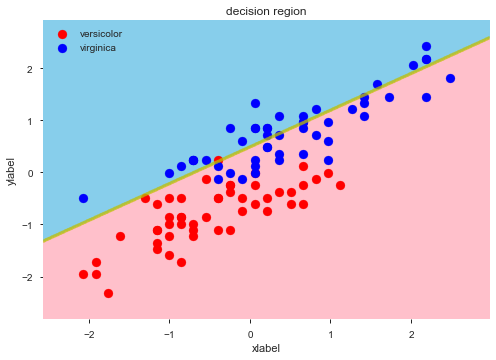

In [283]:
decision_region(X, y, lreg)

In [284]:
evaluation_result_before_norm.loc['LogisticRegression']=evaluation(lreg)
evaluation_result_before_norm

,accuracy,precision,recall,f1,confusion
neighbors,0.40,0.400000,1.0,0.571429,"[[10, 0], [15, 0]]"
LogisticRegression,0.64,0.529412,0.9,0.666667,"[[9, 1], [8, 7]]"


In [285]:
svc.fit(X_train, y_train) 

/Users/ikono/Desktop/kikagaku_data/myvenv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

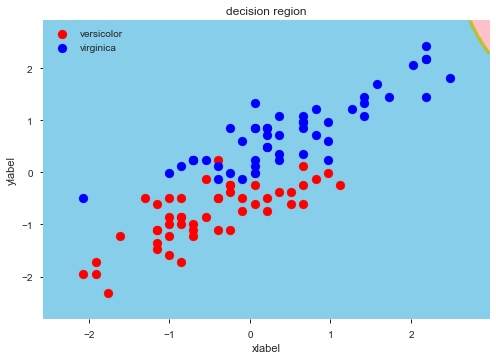

In [286]:
decision_region(X, y, svc)

In [287]:
evaluation_result_before_norm.loc['SVC']=evaluation(svc)
evaluation_result_before_norm

/Users/ikono/Desktop/kikagaku_data/myvenv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ikono/Desktop/kikagaku_data/myvenv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,accuracy,precision,recall,f1,confusion
neighbors,0.40,0.400000,1.0,0.571429,"[[10, 0], [15, 0]]"
LogisticRegression,0.64,0.529412,0.9,0.666667,"[[9, 1], [8, 7]]"
SVC,0.60,0.000000,0.0,0.000000,"[[0, 10], [0, 15]]"


In [288]:
dtc.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

/Users/ikono/Desktop/kikagaku_data/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


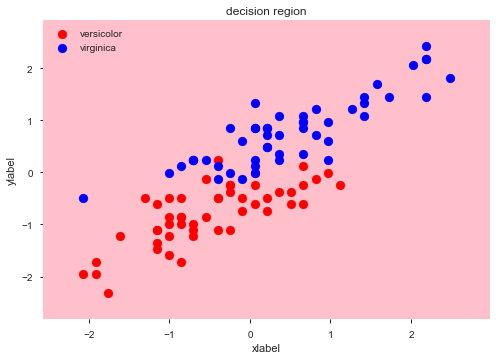

In [289]:
decision_region(X, y, dtc)

In [290]:
evaluation_result_before_norm.loc['DecisionTree']=evaluation(dtc)
evaluation_result_before_norm

,accuracy,precision,recall,f1,confusion
neighbors,0.40,0.400000,1.0,0.571429,"[[10, 0], [15, 0]]"
LogisticRegression,0.64,0.529412,0.9,0.666667,"[[9, 1], [8, 7]]"
SVC,0.60,0.000000,0.0,0.000000,"[[0, 10], [0, 15]]"
DecisionTree,0.40,0.400000,1.0,0.571429,"[[10, 0], [15, 0]]"


In [291]:
rfc.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

/Users/ikono/Desktop/kikagaku_data/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: No contour levels were found within the data range.


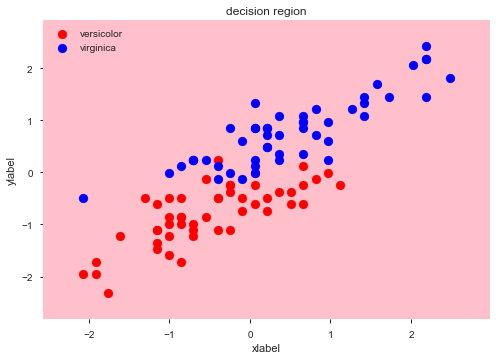

In [292]:
decision_region(X, y, rfc)

In [293]:
evaluation_result_before_norm.loc['RandomForest']=evaluation(rfc)
evaluation_result_before_norm

,accuracy,precision,recall,f1,confusion
neighbors,0.40,0.400000,1.0,0.571429,"[[10, 0], [15, 0]]"
LogisticRegression,0.64,0.529412,0.9,0.666667,"[[9, 1], [8, 7]]"
SVC,0.60,0.000000,0.0,0.000000,"[[0, 10], [0, 15]]"
DecisionTree,0.40,0.400000,1.0,0.571429,"[[10, 0], [15, 0]]"
RandomForest,0.40,0.400000,1.0,0.571429,"[[10, 0], [15, 0]]"


## 考察
ロジスティック回帰を除いて、ほぼ全てをどちらかに推測しており精度が悪い  
おそらく、どちらかに全部偏った推測をすると、損失関数の値が最小になるためと思われる  
正規化されると、そこにバランスが取られる

## 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法

In [294]:
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris_dataset.target, columns=["Species"])

In [295]:
df = pd.concat([X, y], axis=1)

In [296]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [297]:
df3=df.loc[:, ['sepal_length', 'petal_length', 'Species']]

In [298]:
df3.head()

,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [299]:
len(df3)

150

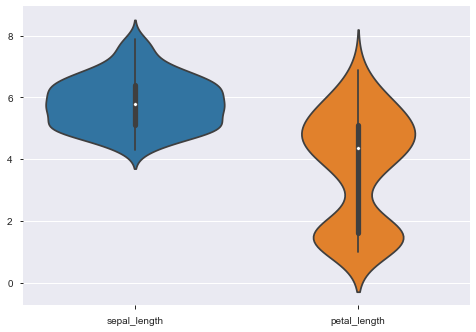

In [300]:
sns.violinplot(data=df3.iloc[: , 0:2])

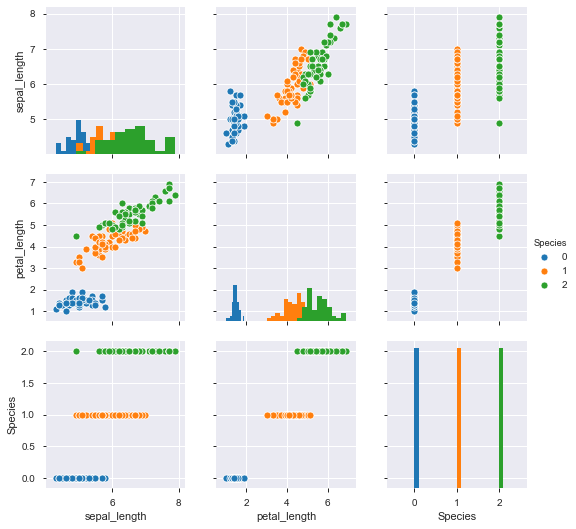

In [301]:
sns.pairplot(df3, hue="Species", diag_kind='hist')

In [325]:
X=df3.loc[ :, ['sepal_length', 'petal_length']]
y=df3.Species
X=X.values
y=y.values

In [326]:
test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

In [336]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [328]:
X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)

In [329]:
nn.fit(X_train_transform, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [337]:
X_transform = scaler.transform(X)

In [334]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region_3(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa','versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lime']
    n_class = 3

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

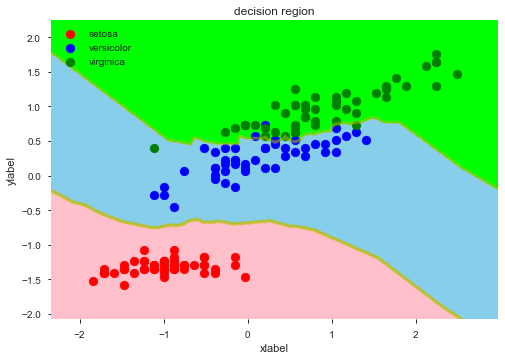

In [338]:
decision_region_3(X_transform, y, nn)

In [343]:
evaluation_result=pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1', 'confusion'])


In [344]:
evaluation_result.loc['neighbors']=evaluation(nn)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [350]:
def evaluation_3(model, X_test_transform=X_test_transform, y_test=y_test):
    nn_predict = model.predict(X_test_transform)

    accuracy = accuracy_score(y_test, nn_predict, 'weighted' )
    precision = precision_score(y_test, nn_predict, average='macro' )
    recall = recall_score(y_test, nn_predict, average='macro' )
    f1 = f1_score(y_test, nn_predict, average='macro'  )
    confusion = confusion_matrix(y_test, nn_predict )
    
    return accuracy, precision, recall, f1, confusion

In [352]:
evaluation_result.loc['neighbors']=evaluation_3(nn)
evaluation_result

,accuracy,precision,recall,f1,confusion
neighbors,0.921053,0.911111,0.921296,0.91511,"[[13, 0, 0], [0, 14, 2], [0, 1, 8]]"


In [353]:
lreg=LogisticRegression()
lreg.fit(X_train_transform, y_train) 

/Users/ikono/Desktop/kikagaku_data/myvenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikono/Desktop/kikagaku_data/myvenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [354]:
evaluation_result.loc['LogisticRegression']=evaluation_3(lreg)
evaluation_result

,accuracy,precision,recall,f1,confusion
neighbors,0.921053,0.911111,0.921296,0.915110,"[[13, 0, 0], [0, 14, 2], [0, 1, 8]]"
LogisticRegression,0.736842,0.809524,0.791667,0.725028,"[[13, 0, 0], [1, 6, 9], [0, 0, 9]]"


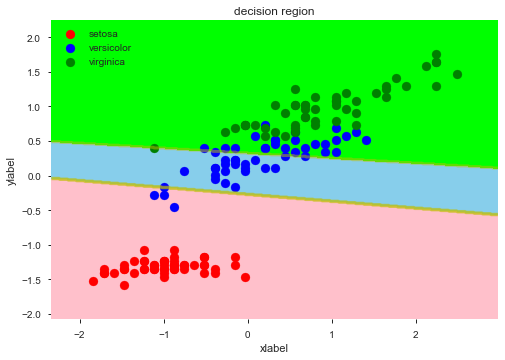

In [355]:
decision_region_3(X_transform, y, lreg)

In [356]:
svc.fit(X_train_transform, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [357]:
evaluation_result.loc['SVC']=evaluation_3(svc)
evaluation_result

,accuracy,precision,recall,f1,confusion
neighbors,0.921053,0.911111,0.921296,0.915110,"[[13, 0, 0], [0, 14, 2], [0, 1, 8]]"
LogisticRegression,0.736842,0.809524,0.791667,0.725028,"[[13, 0, 0], [1, 6, 9], [0, 0, 9]]"
SVC,0.973684,0.966667,0.979167,0.971703,"[[13, 0, 0], [0, 15, 1], [0, 0, 9]]"


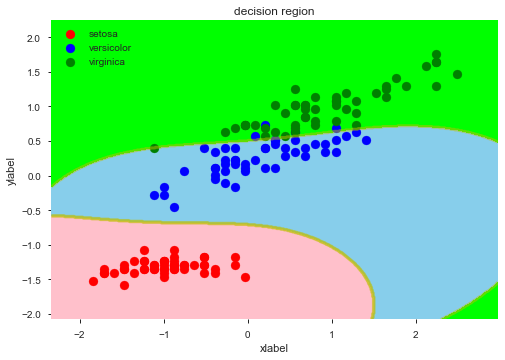

In [359]:
decision_region_3(X_transform, y, svc)

In [360]:
dtc.fit(X_train_transform, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [365]:
evaluation_result.loc['DecisionTreeClassifier']=evaluation_3(dtc)
evaluation_result

,accuracy,precision,recall,f1,confusion
neighbors,0.921053,0.911111,0.921296,0.915110,"[[13, 0, 0], [0, 14, 2], [0, 1, 8]]"
LogisticRegression,0.736842,0.809524,0.791667,0.725028,"[[13, 0, 0], [1, 6, 9], [0, 0, 9]]"
SVC,0.973684,0.966667,0.979167,0.971703,"[[13, 0, 0], [0, 15, 1], [0, 0, 9]]"
DecisionTreeClassifier,0.973684,0.966667,0.979167,0.971703,"[[13, 0, 0], [0, 15, 1], [0, 0, 9]]"


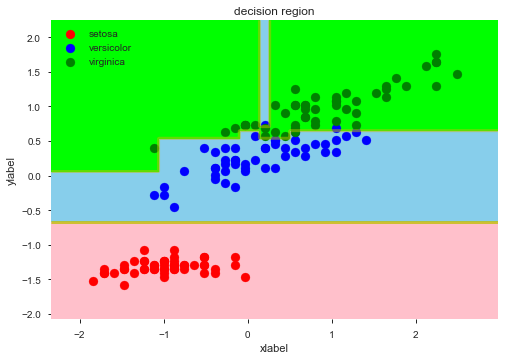

In [362]:
decision_region_3(X_transform, y, dtc)

In [366]:
evaluation_3(dtc)

(0.9736842105263158,
 0.9666666666666667,
 0.9791666666666666,
 0.9717034521788342,
 array([[13,  0,  0],
        [ 0, 15,  1],
        [ 0,  0,  9]]))

In [367]:
evaluation_3(svc)

(0.9736842105263158,
 0.9666666666666667,
 0.9791666666666666,
 0.9717034521788342,
 array([[13,  0,  0],
        [ 0, 15,  1],
        [ 0,  0,  9]]))

In [368]:
rfc.fit(X_train_transform, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [369]:
evaluation_result.loc['RandomForest']=evaluation_3(rfc)
evaluation_result

,accuracy,precision,recall,f1,confusion
neighbors,0.921053,0.911111,0.921296,0.915110,"[[13, 0, 0], [0, 14, 2], [0, 1, 8]]"
LogisticRegression,0.736842,0.809524,0.791667,0.725028,"[[13, 0, 0], [1, 6, 9], [0, 0, 9]]"
SVC,0.973684,0.966667,0.979167,0.971703,"[[13, 0, 0], [0, 15, 1], [0, 0, 9]]"
DecisionTreeClassifier,0.973684,0.966667,0.979167,0.971703,"[[13, 0, 0], [0, 15, 1], [0, 0, 9]]"
RandomForest,0.973684,0.966667,0.979167,0.971703,"[[13, 0, 0], [0, 15, 1], [0, 0, 9]]"


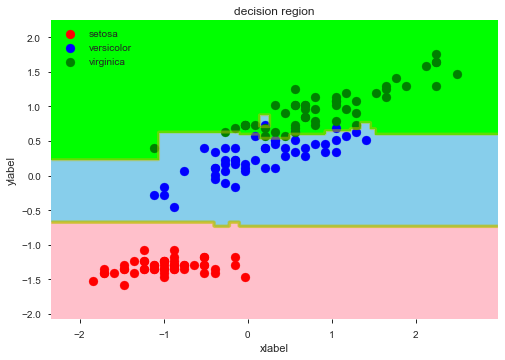

In [370]:
decision_region_3(X_transform, y, rfc)

## 考察
setosaは分類しやすいため、大きな違いはない